# Trabalho 6 - Mineração de Dados - DCC 127
## Professor: Heder Soares Bernardino

### Lucas Augusto Muller
### Pedro Henrique Muniz

In [ ]:
!git clone https://github.com/lucasmullers/mineracao-2020.3.git

Cloning into 'mineracao-2020.3'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 5), reused 10 (delta 1), pack-reused 0
Unpacking objects: 100% (16/16), done.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython

# Pré-processamento dos dados

Inicialmente foi importado o dataset, as informações foram impressas e foi checado se existiam valores não nulos. 

## Importando os dados de treinamento e teste

In [ ]:
df = pd.read_csv('./mineracao-2020.3/trabalho6_dados_5.csv')

print(df)
print()
print(df.info())
print()
print(df.describe())

       temperatura  vacuo  energia
0             9.77  34.69   477.51
1            31.54  67.32   433.02
2            13.63  40.92   462.40
3             9.61  44.03   473.54
4             5.35  35.79   483.20
...            ...    ...      ...
11477        32.14  68.31   436.15
11478        21.90  63.13   447.40
11479        12.72  44.90   463.49
11480        22.70  60.84   438.59
11481        18.64  43.79   465.13

[11482 rows x 3 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11482 entries, 0 to 11481
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperatura  11482 non-null  float64
 1   vacuo        11482 non-null  float64
 2   energia      11482 non-null  float64
dtypes: float64(3)
memory usage: 269.2 KB
None

        temperatura         vacuo       energia
count  11482.000000  11482.000000  11482.000000
mean      19.680066     54.319321    454.373096
std        7.503070     12.738588     17.22

Foi importada a base de teste que será utilizada para predizer todos os valores de energia, com base nos atributos de "temperatura" e "vacuo"


In [ ]:
df_test = pd.read_csv('./mineracao-2020.3/trabalho6_teste.csv')
print(df_test[:5])
print()
print(df_test.info())
print()
print(df_test.describe())

   temperatura  vacuo
0         8.34  40.77
1        23.64  58.49
2        29.74  56.90
3        19.07  49.69
4        11.80  40.66

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperatura  9568 non-null   float64
 1   vacuo        9568 non-null   float64
dtypes: float64(2)
memory usage: 149.6 KB
None

       temperatura        vacuo
count  9568.000000  9568.000000
mean     19.651231    54.305804
std       7.452473    12.707893
min       1.810000    25.360000
25%      13.510000    41.740000
50%      20.345000    52.080000
75%      25.720000    66.540000
max      37.110000    81.560000


## Checagem na correlação dos dados

Percebe-se que existe uma correlação alta entre os atributos "temperatura" e "vacuo" e uma correlação alta, negativa, com o atributo "energia"

In [ ]:
print("Train dataset correlation")
display(df.corr())

print("\n\n\nTest dataset correlation")
display(df_test.corr())

Train dataset correlation


,temperatura,vacuo,energia
temperatura,1.000000,0.849058,-0.951011
vacuo,0.849058,1.000000,-0.872401
energia,-0.951011,-0.872401,1.000000





Test dataset correlation


,temperatura,vacuo
temperatura,1.000000,0.844107
vacuo,0.844107,1.000000


## Checagem de dados duplicados

In [ ]:
duplicateRowsDF = df[df.duplicated(keep='first')].sort_values('temperatura').reset_index(drop=True)
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
      temperatura  vacuo  energia
0            2.71  39.42   489.30
1            2.80  39.64   482.66
2            3.21  38.44   492.93
3            3.38  39.64   488.92
4            3.63  38.44   487.87
...           ...    ...      ...
4292        34.66  74.33   425.89
4293        34.96  68.94   431.48
4294        35.01  74.67   428.48
4295        35.77  73.56   430.14
4296        35.77  73.56   430.14

[4297 rows x 3 columns]


In [ ]:
df = df.drop_duplicates(keep='first').reset_index(drop=True)
print(df)

      temperatura  vacuo  energia
0            9.77  34.69   477.51
1           31.54  67.32   433.02
2           13.63  40.92   462.40
3            9.61  44.03   473.54
4            5.35  35.79   483.20
...           ...    ...      ...
7180        21.54  58.49   449.12
7181        15.74  71.14   457.29
7182        10.02  39.66   480.05
7183        22.70  60.84   438.59
7184        18.64  43.79   465.13

[7185 rows x 3 columns]


## Remoção de outliers com OPTICS e DBSCAN

De forma análoga ao trabalho anterior, foi utilizado os métodos de agrupamento OPTICS e DBSCAN. Inicialmente foi utilizado o OPTICS para definir o parâmetro "eps" a ser utilizado no DBSCAN.

Optic Model
Number of clusters: 4


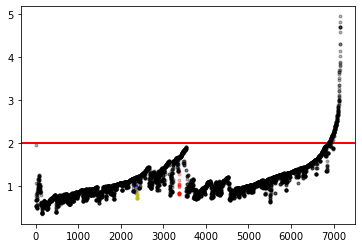

In [ ]:
from sklearn.cluster import OPTICS, DBSCAN

opticModel = OPTICS(min_samples=10, max_eps=5.0, xi=0.15)
y_optic = opticModel.fit_predict(df)

print('Optic Model')
print('Number of clusters: {}'.format(len(set(opticModel.labels_))))
space = np.arange(len(df))
reachability = opticModel.reachability_[opticModel.ordering_]
labels = opticModel.labels_[opticModel.ordering_]
colors = [ "b.", "y.", "r.", "g.", "c." ]
for cclass, color in zip( range(0, 5), colors ):
  Xk = space[ labels==cclass ]
  Rk = reachability[ labels==cclass ]
  plt.plot(Xk, Rk, color, alpha=0.3)

plt.axhline(y=2.0, linewidth=2, color = 'red')
plt.plot( space[ labels == -1 ], reachability[ labels==-1 ], "k.", alpha=0.3 )
plt.show()

Com isso, foram encontrados 167 outliers, de um total de 11482 registros

In [ ]:
dbscanModel = DBSCAN(eps=2.0, min_samples=5, metric='euclidean')
clustering = dbscanModel.fit(df)
y_dbscan = dbscanModel.fit_predict(df)
print(np.count_nonzero(y_dbscan == -1))

df['outliers'] = clustering.labels_
df = df[df['outliers'] != -1]
df = df.drop('outliers', axis=1).reset_index(drop=True)
display(df)
X = df.iloc[:, :2]
y = df.iloc[:, 2:]

150


,temperatura,vacuo,energia
0,9.77,34.69,477.51
1,31.54,67.32,433.02
2,13.63,40.92,462.40
3,9.61,44.03,473.54
4,5.35,35.79,483.20
...,...,...,...
7030,7.79,43.13,484.42
7031,21.54,58.49,449.12
7032,10.02,39.66,480.05
7033,22.70,60.84,438.59


## Plotagem do gráfico 3d

Para uma melhor visualização dos gráficos, foi gerado um gráfico com os três atributos

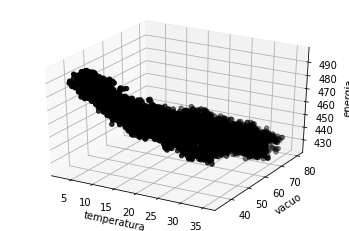

In [ ]:
# https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], y, marker="o", c="black")
ax.set_xlabel("temperatura")
ax.set_ylabel("vacuo")
ax.set_zlabel("energia")

plt.show() 

# Regressão

Para a parte de regressão, foi utilizado o pacote do sklearn e foram gerados 4 conjuntos. X e Y, para treino e teste. Foi utilizado 70% da base de dados para treino e o restante para teste.

Para analisar o desempenho dos diversos tipos de regressão utilizados, foram utilizadas as métricas MSE, MAE e R2.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42 )

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def grid_search(X, y, method, param_dict):
    # cv = [(slice(None), slice(None))]
    gs = GridSearchCV(estimator=method, param_grid=param_dict)
    gs.fit(X, y)
    print(gs.best_params_)
    return gs.best_params_

def calculate_metrics(y_true, y_pred):
    print("MSE Score: {}".format(mean_squared_error(y_true=y_true, y_pred=y_pred)))
    print("MAE Score: {}".format(mean_absolute_error(y_true=y_true, y_pred=y_pred)))
    print("R2 Score: {}".format(r2_score(y_true=y_true, y_pred=y_pred)))

## Linear Regression

A regressão linear obteve resultados bem satisfatórios, visto que é um método bastante simples. Apesar disso, foi o método que obteve o pior desempenho dentre os utilizados neste trabalho.

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred_test = lr.predict(x_test)
calculate_metrics(y_test, y_pred_test)

MSE Score: 20.773644582726867
MAE Score: 3.695969600945898
R2 Score: 0.9257146705529831


## K Neighbors Regressor

Já a regressão com KNN obteve o melor valor em todas as métricas, comparando-se ao demais métodos utilizados aqui, atingindo um valor d 0.974 na métrica R2

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

params = [{'weights': ['uniform', 'distance'], 'n_neighbors': [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]}]
best_params_ = grid_search(x_train, y_train, KNeighborsRegressor(), params)

kNN = KNeighborsRegressor( n_neighbors=best_params_['n_neighbors'], weights=best_params_['weights'] )
kNN.fit(x_train, y_train)

y_pred_test = kNN.predict(x_test)
calculate_metrics(y_test, y_pred_test)

{'n_neighbors': 28, 'weights': 'distance'}
MSE Score: 14.737953572223823
MAE Score: 3.018556554906174
R2 Score: 0.9472979461005212


## Radius Neighbors Regressor

O RNN também obteve bons resultados, melhores do que a regressão linear. Alcançou 0.964 na métrica R2.

In [ ]:
from sklearn.neighbors import RadiusNeighborsRegressor

params = [{'radius':[8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6], 'weights': ['uniform', 'distance']}]
best_params_ = grid_search(x_train, y_train, RadiusNeighborsRegressor(), params)

rNN = RadiusNeighborsRegressor( radius=best_params_['radius'], weights=best_params_['weights'] )
rNN.fit(x_train, y_train)

y_pred_test = rNN.predict(x_test)
calculate_metrics(y_test, y_pred_test)

{'radius': 8.0, 'weights': 'distance'}
MSE Score: 20.64048009511345
MAE Score: 3.721173162461584
R2 Score: 0.9261908589172161


## Decision Tree Regressor

O método por arvore de decisão também obteve bons resultados, ficando bem parecido com o RNN

In [ ]:
from sklearn.tree import DecisionTreeRegressor

params = [{'criterion': ['mse', 'friedman_mse', 'mae'], 'splitter': ['best', 'random'], 'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'random_state':[42]}]
best_params_ = grid_search(x_train, y_train, DecisionTreeRegressor(), params)

tree = DecisionTreeRegressor(criterion=best_params_['criterion'], splitter=best_params_['splitter'], max_depth=best_params_['max_depth'], random_state=42)
tree.fit(x_train, y_train)

y_pred_test = tree.predict(x_test)
calculate_metrics(y_test, y_pred_test)

{'criterion': 'friedman_mse', 'max_depth': 8, 'random_state': 42, 'splitter': 'best'}
MSE Score: 15.688505944943994
MAE Score: 3.111718777499018
R2 Score: 0.9438988268038103


## Random Forest Regressor

De forma semelhante aos demais, utilizando o método "random forest", os resultados obtidos também foram muito bons, equiparando-se aos métodos RNN, KNN e arvore de decisão.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

params = [{'n_estimators':[125, 130, 135], 'max_depth': [20, 25, 30, 35], 'random_state':[42]}]
best_params_ = grid_search(x_train, y_train.values.ravel(), RandomForestRegressor(), params)

forest = RandomForestRegressor(n_estimators=best_params_['n_estimators'], max_depth=best_params_['max_depth'], random_state=42)
# forest = RandomForestRegressor(max_depth=25, random_state=42)
forest.fit(x_train, y_train.values.ravel())

y_pred_test = tree.predict(x_test)
calculate_metrics(y_test, y_pred_test)

{'max_depth': 30, 'n_estimators': 130, 'random_state': 42}
MSE Score: 15.688505944943994
MAE Score: 3.111718777499018
R2 Score: 0.9438988268038103


## Sumarização dos resultados obtidos
|           Método           |                  Parâmetros                 | Mean Squared Error | Mean Absolute Error | R2 Score |
|:--------------------------:|:-------------------------------------------:|:------------------:|:-------------------:|:--------:|
|      Linear Regression     |                      -                      |       20.7736      |        3.6960       |  0.9257  |
|    K Neighbors Regressor   |      n_neighbors: 28 weights: distance      |       **14.7380**       |        **3.0186**       |  **0.9473**  |
| Radius Neighbors Regressor |        radius: 8.6 weights: distance        |       20.6404      |        3.7211       |  0.9262  |
|   Decision Tree Regressor  | criterion: friedman_mse max_depth: 8 splitter: best |       15.6885      |        3.1117       |  0.9439  |
|   Random Forest Regressor  |       max_depth: 30 n_estimators: 130       |       15.6885      |        3.1117       |  0.9439  |

# Pedrizendo os resultados de teste

Os resultados dos métodos indicam que o kNN se saiu melhor de acordo com as 3 métricas, portanto iremos utilizar este método para predizer o valor de energia da base de dados "trabalho6_teste.csv".

Na base de dados de teste nós não aplicamos nenhum pré-processamento, apesar de termos detectado a presença de valores duplicados, pois no enunciado do trabalho diz que os valores de energia devem ser enviados na ordem que aparecem na base, então se removermos estes valores a ordem ficará diferente.

In [ ]:
y_pred = kNN.predict(df_test)
df_test['energia'] = y_pred
display(df_test)

,temperatura,vacuo,energia
0,8.34,40.77,482.699301
1,23.64,58.49,445.963284
2,29.74,56.90,437.177682
3,19.07,49.69,453.090000
4,11.80,40.66,464.430000
...,...,...,...
9563,15.12,48.92,462.590000
9564,33.41,77.95,432.900000
9565,15.99,43.34,463.537776
9566,17.65,59.87,453.015834


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df_test.to_csv('/content/drive/MyDrive/Mineração de Dados/trabalho6_teste.csv', index=False)